In [109]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


El primer pas per a poder treballar amb la nostra base de dades de SQL és procedir a fer la connexió. Per això, m'instalo el mysql connector per a python, utilitzant la funcio % pip install. També es pot intalar des del quadre de comandaments.

In [156]:
import mysql.connector as sql                                               # Estableixo la connexió amb sql connector

mydb= sql.connect(
    host= "localhost",
    user="root",
    password="itacademy",
    database="sprint4")
print(mydb)

Un cop instalat el connector que em permetra connectar la base de dades de SQL amb python, procedeixo a "cridar" el connector. Per a poder connectar, introdueixo tota la informació necessària del SQL, és a dir, les credencials, els nom de la base de dades, etc. Aquest pas equival a fer la connexió. Veig que quan li dono a imprimir fa la connexió, així que ja podré treballar amb la base de dades.

In [160]:
cursor = mydb.cursor()                                                      # Creació d'un cursor on guardaré la consulta amb SQL
cursor.execute("SELECT * FROM companies")
resultats = cursor.fetchall()                                              # Guardo la selecció al dataframe resultats
columnas = [fila[0] for fila in cursor.description]                         # Estableixo les columnes ja que el df no en té
companies = pd.DataFrame(resultats, columns=columnas)                      # Creació del dataframe amb les columnes
companies

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r


Ara que ja tinc la connecio entre python y SQL, el que vull fer es importar-me tota la base de dades. Hi han moltes maneres d'importar la base de dades, jo he escollit la manera més "lenta" per a poder verificar cada vegada la meva base de dades. Els passos que segueixo és fer  la connexió i guardar cada taula de la base de dades en un dataframe, de manera resumida. 
En primer lloc, importo la llibreria pandas (per a poder crear dataframes per a la meva base de dades) i importo el connector. Creo un cursor (s'ha de crear obligatoriament quan es crida la funcio del sql connector). Dins del cursor, el que faig es guardar la seleccio del dataframe escollit amb llenguatge sql. Tots els resultats ( seleccio fetchall) els guardo dins de la variable resultats. Quan faig la seleccio amb el codi sql, la base de dades no esta en format columnes, per això creo la variable columnes, on introdueixo un bucle per a que vagi llegint cada fila de la base de dades i la guardi sencera amb la funció description. En altres paraules, quan importo bases de dades de sql tinc una base de dades pero sense "esquelet" per així dir-ho. Per a poder crear "l'esquelet", he de crear la variable columnes.El últim pas, es crear el dataframe que estarà format per la base de dadesamb les seves respectives columnes. 

He se seguir el mateix pas per a cada taula de la meva base de dades. He escollit aquesta manera perqueè així vaig taula per taula, verificant que les dades son correctes i no s'han importat de manera errònea. Com he dit previament, hi han divereses alternativas, pero en la meva opinió, aquest mètode és molt precís i m'asseguro no tenir ningun error en la meva base de dades.


In [161]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM card_status")
resultados = cursor.fetchall()
columnas = [fila[0] for fila in cursor.description]
card_status = pd.DataFrame(resultados, columns=columnas)
card_status 

,card_id,Status
0,CcU-2938,Activa
1,CcU-2945,Activa
2,CcU-2952,Activa
3,CcU-2959,Activa
4,CcU-2966,Activa
...,...,...
270,CcU-4828,Activa
271,CcU-4835,Activa
272,CcU-4842,Activa
273,CcU-4849,Activa


In [162]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM credit_cards")
resultados = cursor.fetchall()
columnas = [fila[0] for fila in cursor.description]
credit_cards = pd.DataFrame(resultados, columns=columnas)
credit_cards

,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24
...,...,...,...,...,...,...,...,...,...
270,CcU-4828,5,BG11ILMJ30149367569464,4485252735942,2789,942,%B7763464626517588^KmqoxvwFiovcv^5003339322?4,%B4651147303850314=2105859161?2,09/04/22
271,CcU-4835,4,PT34592171131763200132583,3723 677744 22550,1149,680,%B6221188915952608^EnfmdemGugvnr^58053479562?5,%B8187762874317668=9107919781?6,01/08/24
272,CcU-4842,3,SA2156708581957118818229,3774 636724 83250,4655,750,%B2216216733758821^CsszvisPjqcfh^95081856902?1,%B2517312164209886=54047891?9,11/11/24
273,CcU-4849,2,SE2813123487163628531121,5223363813491514,9992,779,%B8844154447682199^JunfxuiCzhsrj^3805344275?5,%B2623983651705584=0207551226?9,03/21/25


In [163]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM product_transaction")
resultados = cursor.fetchall()
columnas = [fila[0] for fila in cursor.description]
product_transaction = pd.DataFrame(resultados, columns=columnas)
product_transaction

,order_id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1
4,1EA2B262-D507-AD14-4374-4D532967113F,1
...,...,...
1452,EAD89828-65AA-E817-F946-E7365972D94E,97
1453,F28E106B-5418-4667-9514-2E2A823ECC65,97
1454,F5ACD74B-4275-5AA1-2414-6EF417636B98,97
1455,F85A7D75-2778-9D75-D776-3F41A828DE88,97


In [164]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM products")
resultados = cursor.fetchall()
columnas = [fila[0] for fila in cursor.description]
products = pd.DataFrame(resultados, columns=columnas)
products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,$9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,$171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,$71.89,#111111,3.0,WH-1
4,5,skywalker ewok,$171.22,#dbdbdb,3.2,WH-0
...,...,...,...,...,...,...
95,96,dooku solo,$20.92,#282828,2.1,WH--91
96,97,jinn Winterfell,$65.25,#bababa,1.0,WH--92
97,98,Direwolf Littlefinger,$38.33,#bababa,2.0,WH--93
98,99,the duel,$151.78,#212121,1.5,WH--94


In [165]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM transactions")
resultados = cursor.fetchall()
columnas = [fila[0] for fila in cursor.description]
transactions = pd.DataFrame(resultados, columns=columnas)
transactions

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.918459,-12.527556
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.969489,-117.525184
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222681,-129.049880
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.359306,-100.555928
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.738145,158.298210
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.319472,-11.413491
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.012168,-64.671544
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.860453,-172.345729
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.075143,-142.241696


In [166]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM user")
resultados = cursor.fetchall()
columnas = [fila[0] for fila in cursor.description]
user = pd.DataFrame(resultados, columns=columnas)
user

,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,"Apr 30, 1984",United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St."
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,"Sep 15, 1989",United States,College,11838,Ap #644-8492 Sagittis St.
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,"Apr 9, 1983",United States,Great Falls,67129,"665-9047 In, Rd."
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,"Apr 16, 1982",United States,Columbus,11595,Ap #374-7325 Sodales Rd.
...,...,...,...,...,...,...,...,...,...,...
270,95,Chase,Ellis,(322) 137-3271,quisque.purus@hotmail.edu,"Dec 19, 2000",United States,New Haven,72721,1311 Accumsan Road
271,96,Brennan,Wynn,(831) 607-3574,nullam.ut@yahoo.net,"Nov 1, 1988",United States,Lewiston,74004,Ap #774-4981 Elementum Avenue
272,97,Joseph,Davidson,1-184-847-8256,mauris@outlook.net,"Jan 18, 1987",United States,Allentown,88451,"P.O. Box 178, 6049 Luctus St."
273,98,Cassandra,Ferguson,(594) 318-2465,eu@google.couk,"May 8, 1992",United States,Tuscaloosa,83383,"497-7857 Eget, Rd."


In [118]:
print(products.dtypes)                                                       # Per a saber el tipus de variables de cada df

id                int64
product_name     object
price            object
colour           object
weight          float64
warehouse_id     object
dtype: object


Utilitzo la funció dtypes per a tenir una idea general de com s'han importat les meves variables. En general, quan es fa l'importació, moltes d'elles es passen com a tipus object. No sol donar molts problemes, pero es recomana cambiar a tipus int o float per a que els codis no donin error.

In [119]:
import pandas as pd                                                          # Importo totes les llibreries que faré servir
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Aquestes son totes les llibreries que es faran servir en aquest sprint 8.1. Cada una d'elles té els seus avantatges:
-pandas = per a  treballar amb dades estructurades
-numpy= per a realitzar i treballar amb operacions estadísitiques
-matplotlib= per a crear gràfics
-seaborn= per visualitzar dades estadístiques

In [120]:
plt.style.available                                                          # Vull veure quins estils de gràfic hi han per escollir un per a tot l'esprint

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

EXERCICI 1 : UNA VARIABLE NUMÈRICA

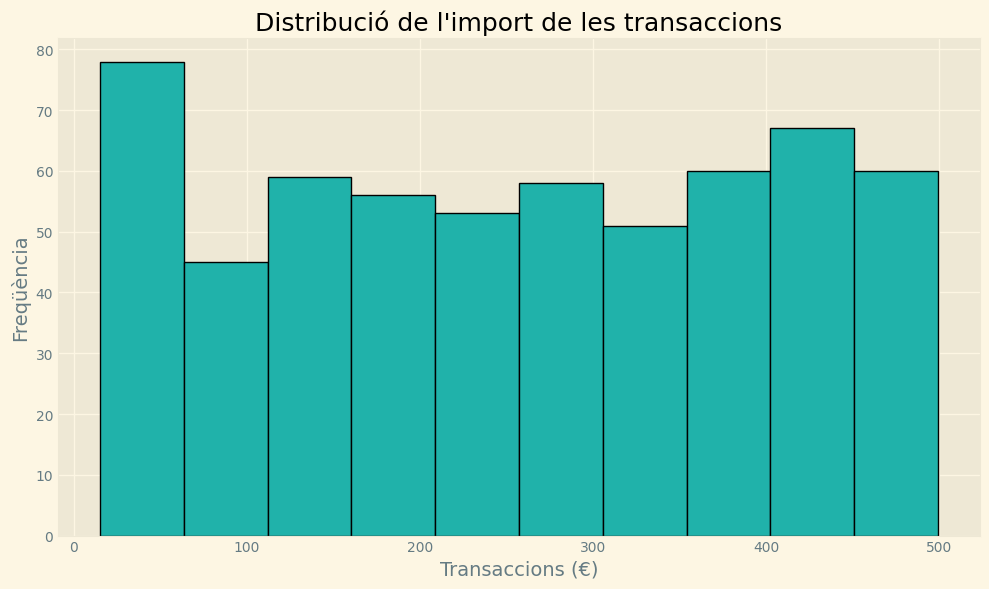

In [121]:
plt.style.use('Solarize_Light2')                                                    # Defineixo l'estil del gràfic 
plt.figure(figsize=(10,6))                                                          # Defineix el tamany 

plt.hist(transactions['amount'], bins=10, color='lightseagreen', edgecolor='black') # Funció que crea l'histograma amb amount

plt.title("Distribució de l'import de les transaccions", fontsize=18)               # Poso títol
plt.xlabel('Transaccions (€)', fontsize=14)                                         # Poso títol a l'eix x
plt.ylabel('Freqüència', fontsize=14)                                               # Poso títol a l'eix y

plt.tight_layout()                                                                  # Aquesta funció ajusta els márgens automáticament 
plt.show()                                                                          # Per a mostrar el mapa 


L'histograma representa la distribució de l'import de les transaccions realitzades. A primera vista, s'observa que els imports van de 15€ a 500€ i la freqüencia d'aquestes va entre 45 a 75 transaccions.
S'observa que les transaccions més freqüentada son les que van de 0 a 50€, més concretament amb una freqüència de 75 vegades. Per altra banda, les transaccions de 50€ a 100€ són les que tenen la freqüència menor. 
Es pot concluir que hi ha un import que destaca per sobre de la resta (compren de 15€ a 50€), i que la resta de transaccions tenen una tendencia bastant uniforme en quan a freqüència. En altres paraules, es pot concluir que la mostra esta distribuida de manera equitativa, sense tenir en compte els docs pics màxims. Es destaca un pic no molt pronunciat en les transaccions que conformen l'interval de 400€ a 450€. 
Com  a idea general, interpretat el comportament de les transaccions, es pot dir que hi han dos grups de transaccions ben diferenciades. EL primer grup, conformat per transaccions d'import baix (menys 100€), possiblement microtransaccions o compres petites i el segon grup, conformat per transaccions d'un import elevat(entre  400@ i 450€).
Com a sugerencia, interpretant el gràfic com al comportament de les ventes, es recomana realitzar un estudi de mercat o una investigació enfocada al perfil del client, per a poder veure si aquests dos comportaments destacats de les transaccions pertanyen a diferents perfils de clients. D'aquesta manera, es podran realutzar politiques i estrategies de venta especifiques per a poder augmentar les ventes segons els perfils dels usuaris / clients.
L'última suggerencia, per a poder entendre més el comportament d'aquestes transaccions, seria fer una comparacio temporal per a veure si aquests dos pics es comporten d'igual manera en periode clau, com per exemple, vacances, rebaixes, promocions de temporada, etc. Amb aquesta comparació temporal, podriem veure si aquests pics son resultats d'estrategies compercials temproals o son comportaments estables de la societat.

EXERCICI 2 : DUES VARIABLES NUMÈRIQUES

In [123]:
products.dtypes                                                           # Miro el tipus de variables del df product per a veure com tinc el preu. 

products['price'] = products['price'].replace({'\$': ''}, regex=True)      # Trec el símbol del dòlar per a que no em surti graficat en el gràfic de dispersió que faré
products['price'] = products['price'].astype(float)                       # Canvio el preu de tipus OBJECT a tipus FLOAT per a poder treballar amb dispersions


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lcusc\AppData\Local\Temp\ipykernel_14228\4063782805.py:3: SyntaxWarning: invalid escape sequence '\$'
  products['price'] = products['price'].replace({'\$': ''}, regex=True)      # Trec el símbol del dòlar per a que no em surti graficat en el gràfic de dispersió que faré


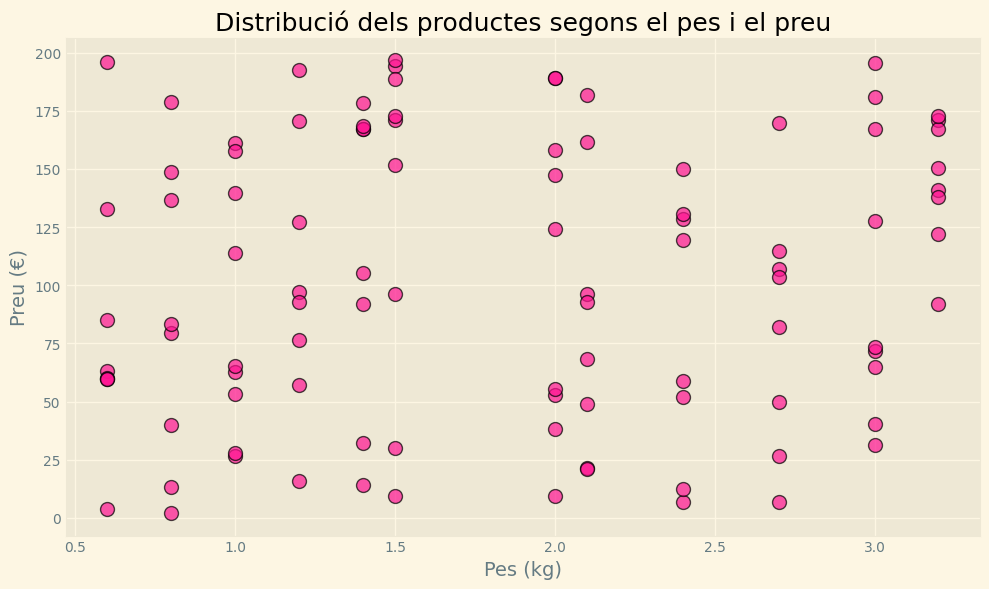

In [124]:
import matplotlib.pyplot as plt                                               # Importo les llibreries necessàries
import pandas as pd

plt.style.use('_mpl-gallery')                                                 # Defineixo l'estil del gràfic 

plt.figure(figsize=(10, 6))                                                   # Defineixo el tamany del gràfic 

plt.scatter(products['weight'], products['price'], color='deeppink', edgecolor='black', alpha=0.7, s=100)

plt.title('Distribució dels productes segons el pes i el preu', fontsize=18)  # Títol
plt.xlabel('Pes (kg)', fontsize=14)                                           # Títol eix x
plt.ylabel('Preu (€)', fontsize=14)                                           # Títol eix y

plt.tight_layout()                                                            # Aquesta funció ajusta els màrgens automàticament
plt.show()


Aquest gràfic mostra la relació entre el preu i el pes dels productes. Hi han 6 categories diferents de pes, i els preus oscilen entre 0€ i 200€. 
No s'observa una relacio clara entre pes i preu, no es veu ninguna correlació ni causalitat. Aquesta falta de relació podria indicar que son unes altres variables que afecten al preu, com per exemple, la qualitat del material, el tamany,l'origen, el tipus de producte, a qui va dirigit, etc.
Es suggereix fer un estudi de mercat per a veure el comportament de compra dels usuaris, per a poder intentar identificar patrons de consum, ja que aquest gràfic no denota que hi hagiuna correlacio entre el preu i el pes, lo que pot indicar una oportunitat clara per a incentivar el consum de productes de preu elevat.


EXERCICI 3 : UNA VARIABLE CATEGÒRICA

In [ ]:
pip install squarify                                                          # Des del quadre de comandament veig que no tinc el squarify instalat, aixi que l'instalo

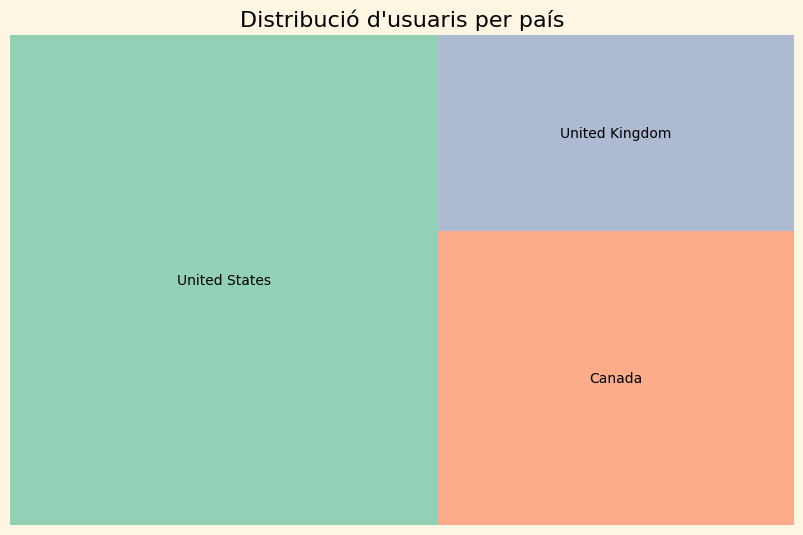

In [125]:
import matplotlib.pyplot as plt                                               # Importo les llibreries
import squarify
import pandas as pd

country_users = user['country'].value_counts().reset_index()                  # Conteig del número d'usuaris per país i reindexo
country_users.columns = ['country', 'count']                                  # Guardo el conteig per país en un df nou i el converteizo a df amb columnes per a poder treballar amb ell en un futur


plt.figure(figsize=(8, 5))                                                    # Creació del Treemap

squarify.plot(sizes=country_users['count'],                                   # Defineixo com vull el Treemap
              label=country_users['country'], 
              alpha=0.7, 
              color=plt.cm.Set2(range(len(country_users))))


plt.title("Distribució d'usuaris per país")
plt.axis('off')                                                               # Amago els eixos per a millorar l'estètica de la visualtzació

plt.show()


En aquest gràfic, es pot observar la quantitat d'usuaris per país. S'observa que hi han solament tres païssos, dels quals estats Units és el país d'on més usuaris hi han. EL pais que menys usuaris té es Regne Unit. Aquest gràfic és molt útil per a poder veure l'origen dels usuaris, i poder fer campanyes publicitaries o companyes de captació segons el país, la cultura, la mentalitat, etc.
Com a suggerencies, es recomana fer polítiques de captació de clients segons la cultura. Es recomana fer estudis de mercat per país, i veure quins comportaments destaquen en cada país, per a poder dissenyar polítiques de captació d'usuaris específiques. També es poden fer altres politiques diferents, com per exemple politiques que tinguin com objectiu retenir els usuaris d'Estats Units, com per exemple, aplicar bonus, descomptes, bonificacions per lealtat, etc. 

EXERCICI 4 : UNA VARIABLE CATEGÒRICA I UNA NUMÈRICA

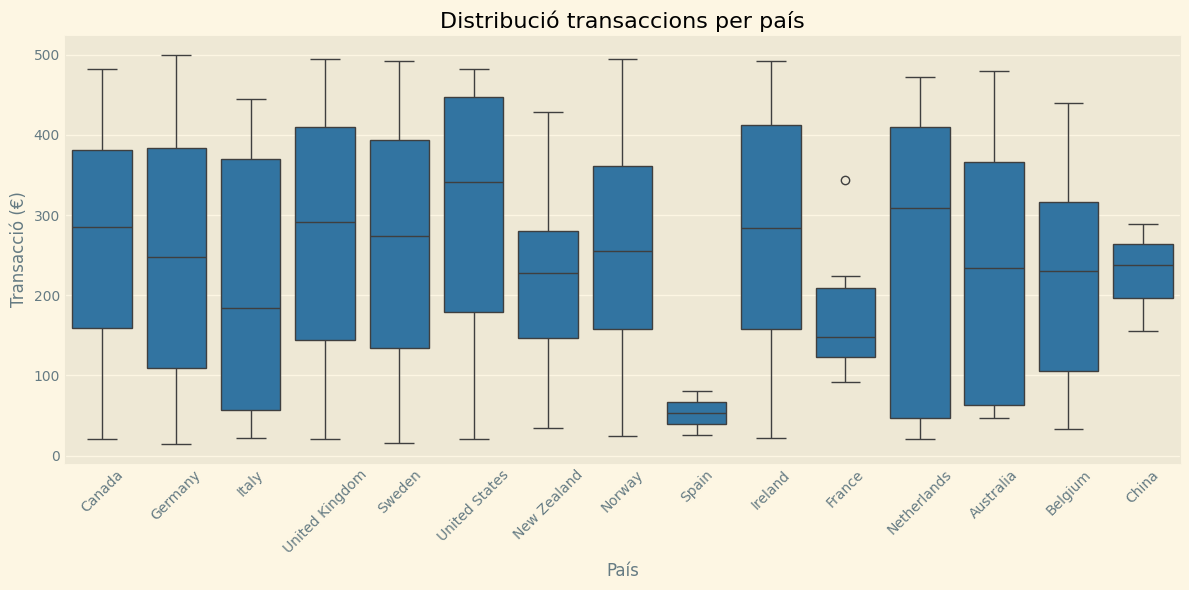

In [126]:
import seaborn as sns                                                                         # Importo les llibreries
import matplotlib.pyplot as plt
import pandas as pd

df_combinat = pd.merge(transactions, companies, left_on='business_id', right_on='company_id') # He d'unir els dos df amb la funció MERGE

plt.figure(figsize=(12, 6))                                                                   # Defineixo tamany gràfic
sns.boxplot(x='country', y='amount', data=df_combinat )                                       # Creació del boxplot

plt.title('Distribució transaccions per país', fontsize=16)                                   # Títol i etiquetes
plt.xlabel('País', fontsize=12)
plt.ylabel('Transacció (€)', fontsize=12)

plt.xticks(rotation=45)                                                                        # Agrego una rotació en diagonal per a fer mes estetica i visual la lectura dels païssos
plt.tight_layout()                                                                             # Per ajustar automàticament els marges
plt.show()


En el gràfic, sobserva la distribució de les transaccions per cada país. A primera vista, veiem que hi han un total de 15 païssos amb transaccions. El país que destaca amb la mediana més elevada és Estats Units, amb una mediana d'uns 345€. El país amb la mediana més baixa és Espanya, amb una mediana de 55€ aproximadament. Si mirem el top 3 païssos amb la mediana més elevada ( USA, UK i Païssos Baixos) i amb la més petita (Espanya, França i Italia), podem concloure que els paíssos de la zona sud tendeixen a tenir una mediana de transaccions molt més inferiors als païssos de la zona nord. Aquesta caracteristica es pot deure a diversos motius, per exemple, motius culturals , geogràfics, econòmics, polítics, etc. 
S'observa un país amb un valor extrem (outlier), França, amb una transacció que no segueix la tendència de la mostra, sent de 350€ aproximadament.
Per últim, els païssos amb menor dispersió són : Espanya, França i Xina.
Si interpretem les transaccions com el consum per país, es podrien realitzar politiques orientades a impulsar el consum en els païssos amb menor d'aquests. Per exemple, per a incrementar el valor i les quantitats de les transaccions d'Espanya, es podria fer una investigació dels patrons de compres dels usuaris, els productes més venguts, investigacions de la competencia o comparacions amb païssos amb les mateixes característiques. 
Per altra banda, per a mantenir el nivell de transaccions d'USA, es podrien implementar politiques de manteniment del consum, ja sigui establint bonificacions, plans de lealtat als consumidors, descomptes, etc. 

EXERCICI 5 : DUES VARIABLES CATEGÓRIQUES

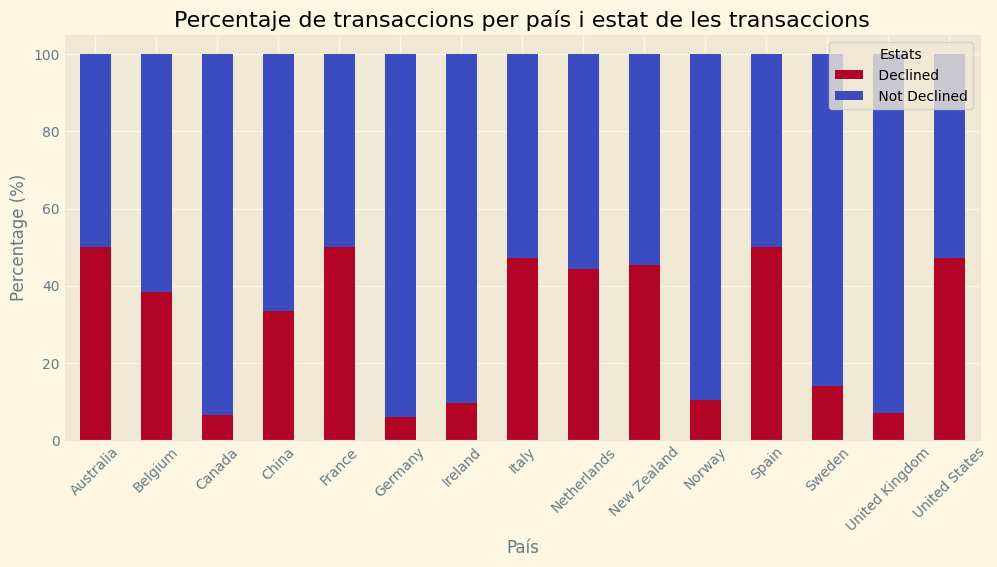

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.merge(transactions, companies, left_on='business_id', right_on='company_id')     # Faig un merge entre els dos dataframes amb els que vull treballar
merged_df['declined_status'] = merged_df['declined'].map({0: ' Not Declined', 1: ' Declined'})  # Converteixo el estat de la transacció  en variable categórica 

count_data = merged_df.groupby(['country', 'declined_status']).size().unstack(fill_value=0)     # Conteig del número de transaccions i de l'estat d'aquestes
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100                          # Calcular el porcentaje suman entre el total i multiplico per 100

ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm_r')     # Gràfic de barres apilades

plt.title('Percentaje de transaccions per país i estat de les transaccions', fontsize=16)       # Etiquetes
plt.xlabel('País', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Estats')

plt.tight_layout()                                                                              # Mostrar el gràfic
plt.xticks(rotation=45) 
plt.show()


Aquest gràfic mostra el percentatge de transaccions acceptades i no acceptades. Es molt útil per investigar patrons de comportaments per païssos per exemple. 
A primera vista, s'observa que la major part de païssos presenten un elevat percentatge de transaccions acceptades(en color blau), especialment Alemania, Canada i Regne Unit, superant el 80% de transaccions acceptades. Per altra banda, s'observa que FRança Espanya i Estat Units presenten el  major percentatge de transaccions declinades. arriban al 50%.
Un elevat nombre de transaccions rebutjades pot indicar diferencies en les polítiques bancaries, diferents comportaments del consumidor o diferents requisits de verificació de transaccions per exemple. Es suggereix fer estudis de mercat especifics per diferents zones geogràfiques per a poder analitzar en profunditat quins sons els païssos amb un mercat més rígid, per a poder implementar estratègies de negoci per a augmentar el percentatge de transaccions.

 Cal aclarir que el gràfic no es 100% representatiu ja que el número de transaccions varia per país. Es un gràfic útil per veure la tendencia de les transaccions, però no es pot comparar ni prendre decisions degut a la disparitat en el número de transaccions per pais.

EXERCICI 6 : TRES VARIABLES

In [141]:
import pandas as pd
from datetime import datetime                                          # Importo la llibreria datetime perque vull convertir dates 


user['birth_date'] = pd.to_datetime(user['birth_date'])                # Converteixo el dia de naixement a tipus datetime per a poder treballar sense errors

current_date = datetime.now()                                          # Guardo el dia d'avui en la variable current_date

age = user['age'] = user['birth_date'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day))) # Aqui calculo l'edad actual restant la data actual i la data de naixement. Aplico la funció lambda amb condició per a que l'edad sigui exacte, tenint en compte si han nascut en el mateix any o no.

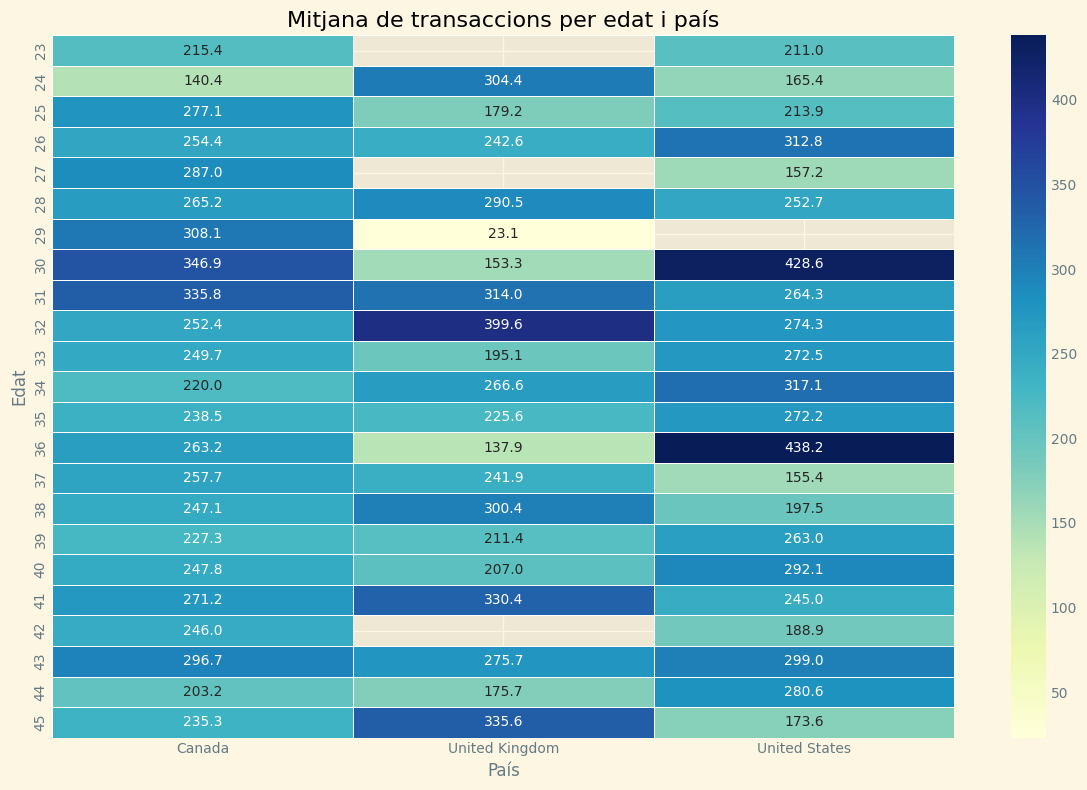

In [151]:
import pandas as pd                                                                                      # Importo llibreries
import seaborn as sns
import matplotlib.pyplot as plt

unio_1 = pd.merge(transactions, companies, left_on='business_id', right_on='company_id')                 # Com vull treballar amb diferents dfs, utilitzo la funcio merge per a unir-le
unio_2 = pd.merge(merged_df, user, left_on='user_id', right_on='id')

agrupacio = unio_2.groupby(['country_y', 'age'])['amount'].mean().reset_index()  
heatmap_data = agrupacio.pivot(index='age', columns='country_y', values='amount')                        # Aquí creo un dataframe on guardo la taula pivot (es necessàri per a realitzar el heatmap)

plt.figure(figsize=(12, 8))                                                                              # Creació del heatmap amb seaborn
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

plt.title('Mitjana de transaccions per edat i país', fontsize=16)                                         # Eixos
plt.xlabel('País', fontsize=12)
plt.ylabel('Edat', fontsize=12)

plt.tight_layout()                                                                                       # Per ajustar automàticament els marges
plt.show()                                                                                               # Guardo les variables en un dataframe reindexat 




Aquest gràfic de calor mostra la mitjana de transaccions per edad i per país. 
A primera vista, s'observen diferencies clares entre els tres païssos. En general, Estats Units és la mitjana de transaccions es la més elevada, més concretament a l'edat de 36 i 30 anys respectivament. Això pot indicar que el poder adquisitu en Estats Units és superior a la resta de païssos. Per altra banda, s'observa que UK és on menys es gasta en general, indicant potser un poder de compra inferior. Per últim, a Canada s'observa que els valors estan més distribuits, sense un patró tan marcat, i amb uns promedis més moderats.
En general, s'observa que el rang d'edat 30-35 anys és el rang on més consum hi ha. Sabent això, es suggereix dissenyar politiques especifiques per a incentivar encara més el consum. També seria bona idea fer un estudi sobre els patrons de consum, per aixi veure en què es gasten els diners i poder dur a terme campanyes estrategiques. Per a Estats Units i Canada s'haurien de dissenyar campanyes per mantenir el consum, com per exemple aplicant descomptes, bonus, i tot tipus d'estrategies per a retenir aquest comportament de consum. Per altra banda, al Regne Unit, les campanyes harien de ser bastant diferents, ja que el principal objectiu seria incrementar el consum dels ususaris. Investigant el mercat, la competencia o estudiant els perfils dels usuaris, ajudaria molt per a tenir una idea dels punts febles del mercat de UK. 

EXERCICI 7 : GRAFICAR UN PAIRPLOT

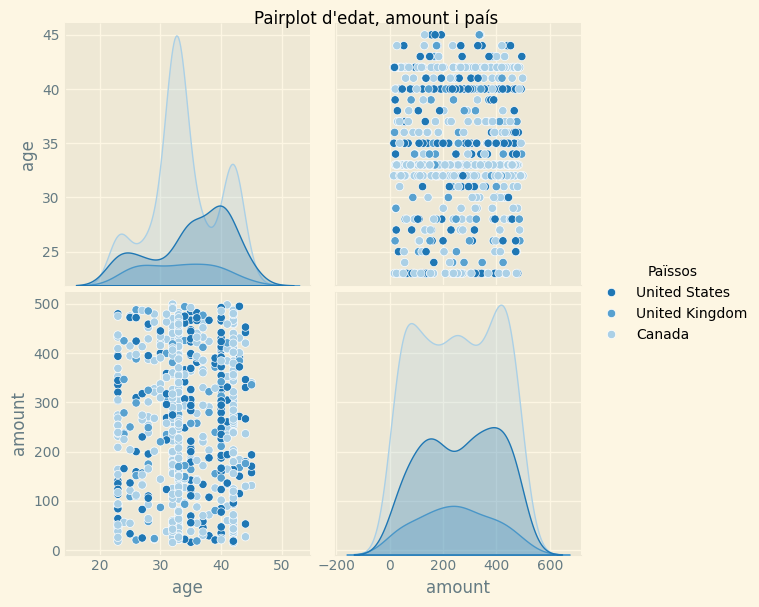

In [131]:
import pandas as pd                                                                                    # Importo les llibreries
import seaborn as sns
import matplotlib.pyplot as plt

unio_primera = pd.merge(transactions, companies, left_on='business_id', right_on='company_id')         # Com vull treballar amb df diferents, utilitzo la funcio merge per a unir-les
unio_segona = pd.merge(unio_primera, user, left_on='user_id', right_on='id')

pairplot_dades = unio_segona[['age', 'amount', 'country_y']]                                           # Guardo les variables amb les que vull treballar en un df nou


dataframe = sns.pairplot(pairplot_dades, hue='country_y', diag_kind='kde', height=3)                   # Creació del pairplot. Per a cambiar el tamany, utilitzo la funció height.
dataframe._legend.set_title("Païssos")                                                                 # Modifico el títol de la llegenda

plt.suptitle("Pairplot d'edat, amount i país", y=1.0)                                                  # Modifico el títol
plt.show()



Aquest últim gràfic mostra la relació entre l'edat i el consum (transaccions) segmentat per país.
En el primer gràfic, es mostra la distribució de les edats, sent el rang de 25 a 35 anys on més es consumeix, és a dir, la més activa en el sentit de compres. En quant als païssos, els tres semblen tenir una concentració vora els 30 anys. S'observa que Canada és el país amb una concentració major en torn als 35 anys i consta d'un pic als 45 anys. Aixo indica que els compradors a Canada són més grans que els d'America i UK.
Per altra banda, si mirem el gràfic de la distribució de transaccions (4 gràfic), s'observa que el amount més comú va dels 100 fins els 400 euros. El gràfic consta de d'amount negatiu, lo que pot representar devolucions, reemborçaments o transaccions fallides. Es suggereix fer un estudi del amount amb més presició per a poder implementar mesures per evitar tenir amount en negatiu.
No s'observa una relació clara entre l'edat i les transaccions(gràfics 2 i 3), és a dir, les transaccions no depenen de l'edat. Canada i UK tenen una distribuciño bastant similar en quant a l'edat i les transaccions. No obstant això, Estats Units mostra una major dispersió en les transaccions, més concretament, amb més transaccions d'un valor major, lo que podria indicar que el poder adquisitiu dels usuaris és més elevat. 
